In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import tempfile
model_dir = tempfile.mkdtemp()

C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1ty

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('psi_df_2016_2019.csv')

In [4]:
df.head()

,national,south,north,east,central,west,timestamp
0,47,44,37,47,47,34,2016-02-07T18:00:00+08:00
1,59,57,54,59,57,56,2016-02-08T23:00:00+08:00
2,59,57,55,59,57,56,2016-02-09T01:00:00+08:00
3,59,57,55,59,56,56,2016-02-09T02:00:00+08:00
4,59,58,55,59,56,56,2016-02-09T03:00:00+08:00


In [5]:
df = df.drop('timestamp', axis=1)

In [6]:
# Bins Data with melt
bins =  [0 ,55 ,150 ,250 ,np.inf]
dfmelt = df.melt()
dfmelt.value = pd.cut(dfmelt.value, bins, labels=[1, 2, 3, 4])

In [7]:
dfmelt.head()

,variable,value
0,national,1
1,national,2
2,national,2
3,national,2
4,national,2


In [8]:
dfmelt[dfmelt['variable'] == 'north'].head()

,variable,value
60044,north,1
60045,north,1
60046,north,1
60047,north,1
60048,north,1


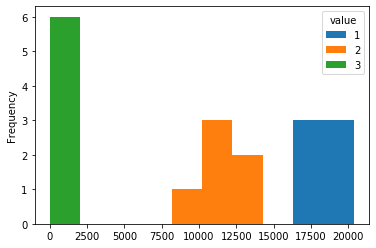

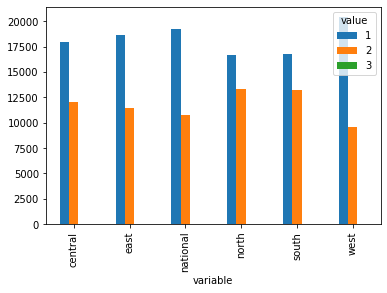

In [9]:
pd.crosstab(dfmelt.variable,dfmelt.value).plot(kind = 'hist')
pd.crosstab(dfmelt.variable,dfmelt.value).plot(kind = 'bar')

In [12]:
frame = [df, dfmelt.value]

In [13]:
#concat
df_con = pd.concat(frame,axis = 1)

In [14]:
df_con.head()

,national,south,north,east,central,west,value
0,47.0,44.0,37.0,47.0,47.0,34.0,1
1,59.0,57.0,54.0,59.0,57.0,56.0,2
2,59.0,57.0,55.0,59.0,57.0,56.0,2
3,59.0,57.0,55.0,59.0,56.0,56.0,2
4,59.0,58.0,55.0,59.0,56.0,56.0,2


In [15]:
df_con['value'] = df_con['value'].astype(int)

In [16]:
df_con.head()

,national,south,north,east,central,west,value
0,47.0,44.0,37.0,47.0,47.0,34.0,1
1,59.0,57.0,54.0,59.0,57.0,56.0,2
2,59.0,57.0,55.0,59.0,57.0,56.0,2
3,59.0,57.0,55.0,59.0,56.0,56.0,2
4,59.0,58.0,55.0,59.0,56.0,56.0,2


In [17]:
df_con.columns

Index(['national', 'south', 'north', 'east', 'central', 'west', 'value'], dtype='object')

### Normalize Data

In [18]:
cols_to_norm = ['national', 'south', 'north', 'east', 'central', 'west']

In [19]:
df_con[cols_to_norm] = df_con[cols_to_norm].apply(lambda x : (x - x.min()) / (x.max() - x.min() ))

In [20]:
df_con.head()

,national,south,north,east,central,west,value
0,0.261538,0.179104,0.142857,0.282051,0.241135,0.141732,1
1,0.353846,0.276119,0.277778,0.384615,0.312057,0.314961,2
2,0.353846,0.276119,0.285714,0.384615,0.312057,0.314961,2
3,0.353846,0.276119,0.285714,0.384615,0.304965,0.314961,2
4,0.353846,0.283582,0.285714,0.384615,0.304965,0.314961,2


In [21]:
df_con.columns

Index(['national', 'south', 'north', 'east', 'central', 'west', 'value'], dtype='object')

In [22]:
#Feature Cols
national_df = tf.feature_column.numeric_column('national')
south_df = tf.feature_column.numeric_column('south')
north_df = tf.feature_column.numeric_column('north')
east_df = tf.feature_column.numeric_column('east')
central_df = tf.feature_column.numeric_column('central')
west_df = tf.feature_column.numeric_column('west')

In [23]:
# Assigned
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('value',
                                                                           [1, 2, 3, 4]
                                                                          )

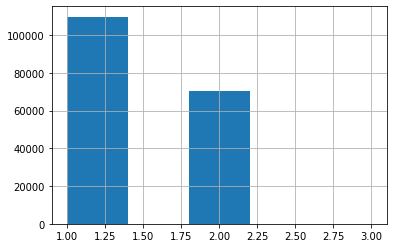

In [24]:
df_con['value'].hist(bins = 5)

In [25]:
feat_cols = [national_df,south_df,north_df,east_df,central_df,west_df]

In [26]:
X_data = df_con.drop('value',axis = 1)
labels = df_con['value']

In [27]:
X_data.head()

,national,south,north,east,central,west
0,0.261538,0.179104,0.142857,0.282051,0.241135,0.141732
1,0.353846,0.276119,0.277778,0.384615,0.312057,0.314961
2,0.353846,0.276119,0.285714,0.384615,0.312057,0.314961
3,0.353846,0.276119,0.285714,0.384615,0.304965,0.314961
4,0.353846,0.283582,0.285714,0.384615,0.304965,0.314961


In [28]:
labels

0         1
1         2
2         2
3         2
4         2
         ..
180127    2
180128    2
180129    2
180130    2
180131    2
Name: value, Length: 180132, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_data, labels, test_size=0.3, random_state=101)

## Create Model

In [31]:
train_input_fn = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size = 10
                                                     , num_epochs= 1000, shuffle= True, )

In [32]:
em_group_col = tf.feature_column.embedding_column(assigned_group, dimension= 4)

In [33]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size= 10 , num_epochs= 1000, shuffle= True)

In [34]:
my_dnn_model = tf.estimator.DNNClassifier(model_dir = model_dir,
                                          hidden_units=[20,20,10,10,20,15],
                                          feature_columns= feat_cols,
                                          n_classes = 4)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Janne\\AppData\\Local\\Temp\\tmpjzgs4h2b', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000027AB0E8A780>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [35]:
my_dnn_model.train(input_func, steps= 10000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `

In [36]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y= y_test, batch_size= 10,num_epochs = 1,shuffle=False)

In [37]:
result = my_dnn_model.evaluate(test_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-06-12T17:20:02Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\Janne\AppData\Local\Temp\tmpjzgs4h2b\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-06-12-17:20:20
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.609826, average_loss = 0.6696331, global_step = 10000, loss = 6.696331
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: C:\Users\Janne\AppData\Local\Temp\tmpjzgs4h2b\model.ckpt-10000


In [38]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size= 10, num_epochs = 1, shuffle = False)

In [39]:
prediction = my_dnn_model.predict(pred_input_func)

In [40]:
my_prediction = list(prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Janne\AppData\Local\Temp\tmpjzgs4h2b\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [41]:
my_prediction

[{'logits': array([-7.893602 ,  2.4626417,  2.0620582, -6.777034 ], dtype=float32),
  'probabilities': array([1.9037469e-05, 5.9878165e-01, 4.0114117e-01, 5.8147139e-05],
        dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1, 2, 3]),
  'all_classes': array([b'0', b'1', b'2', b'3'], dtype=object)},
 {'logits': array([-7.893602 ,  2.4626417,  2.0620582, -6.777034 ], dtype=float32),
  'probabilities': array([1.9037469e-05, 5.9878165e-01, 4.0114117e-01, 5.8147139e-05],
        dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1, 2, 3]),
  'all_classes': array([b'0', b'1', b'2', b'3'], dtype=object)},
 {'logits': array([-7.893602 ,  2.4626417,  2.0620582, -6.777034 ], dtype=float32),
  'probabilities': array([1.9037469e-05, 5.9878165e-01, 4.0114117e-01, 5.8147139e-05],
        dtype=float32),
  'class_ids': array([1], dtype=int64),
 

In [42]:
print(result)

{'accuracy': 0.609826, 'average_loss': 0.6696331, 'loss': 6.696331, 'global_step': 10000}


In [43]:
print("model directory = {}".format(model_dir))
for key in sorted(result):
    print("{}: {}".format(key, result[key]))

model directory = C:\Users\Janne\AppData\Local\Temp\tmpjzgs4h2b
accuracy: 0.6098260283470154
average_loss: 0.6696330904960632
global_step: 10000
loss: 6.696331024169922
